# 1-й этап.

Создание модели на необработанных и не заполненных данных

Это нужно для того, чтобы понять какую модель лучше всего использовать для предсказания score

Обработка данных (неполная)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/2-й кейс самолета/train.csv")
df_train.head(10)

<ipython-input-226-7c2babe4e216>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
df_valid = pd.read_csv("/content/drive/MyDrive/2-й кейс самолета/valid.csv")
df_valid.head(10)

<ipython-input-227-1b4308a2fe51>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df_valid = pd.read_csv("/content/drive/MyDrive/2-й кейс самолета/valid.csv")


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
5,2023-05-01,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8436000.0,8436000.0,8436000.0,0.256718
6,2023-05-01,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7106000.0,7106000.0,7106000.0,NaN,NaN,NaN,7106000.0,7106000.0,7106000.0,0.266021
7,2023-05-01,56,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263619
8,2023-05-01,58,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
9,2023-05-01,60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7014370.0,7014370.0,7014370.0,NaN,NaN,NaN,7014370.0,7014370.0,7014370.0,0.264464


# Тип распределения

Определение типа распределения данных и выбросов является важной задачей, так как это может повлиять на качество и результаты модели, и поможет определить наиболее подходящие варианты работы с данными

Основные статистические характеристики:
          client_id        target      col1      col2       col3       col4  \
count  14456.000000  14456.000000  3.000000  6.000000  12.000000  19.000000   
mean    2853.066270      0.030160  0.333333  0.500000   0.306548   0.346140   
std     1957.002315      0.171035  0.577350  0.547723   0.460514   0.452933   
min        1.000000      0.000000  0.000000  0.000000   0.000000   0.000000   
25%     1186.000000      0.000000  0.000000  0.000000   0.000000   0.000000   
50%     2568.000000      0.000000  0.000000  0.500000   0.000000   0.000000   
75%     4258.250000      0.000000  0.500000  1.000000   0.758929   0.839286   
max     8302.000000      1.000000  1.000000  1.000000   1.000000   1.000000   

            col5       col6          col7          col8  ...       col2654  \
count        1.0        1.0  3.000000e+00  8.000000e+00  ...  6.207000e+03   
mean   7464071.0  7464071.0  4.762016e+06  4.127563e+06  ...  6.951439e+06   
std          N

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Топ коррелирующих колонок с целевой переменной:
target     1.000000
col1407    0.535408
col1411    0.510930
col1201    0.503158
col1419    0.501617
col1305    0.444153
col1211    0.431163
col2144    0.430539
col2145    0.428376
col2143    0.422154
dtype: float64


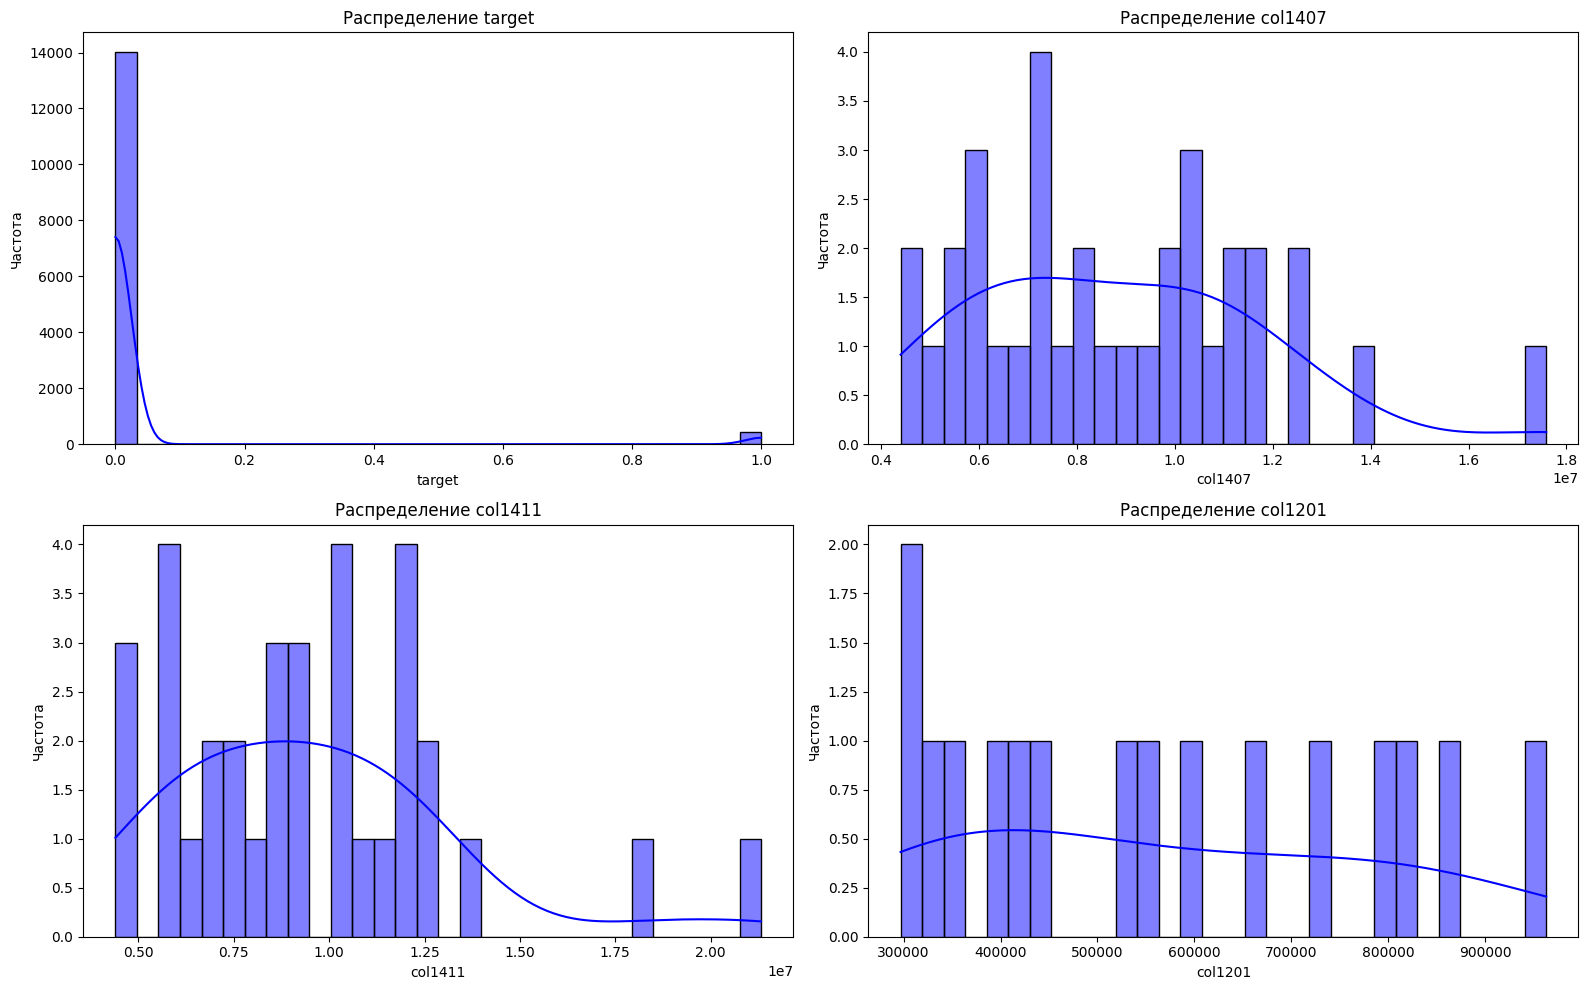

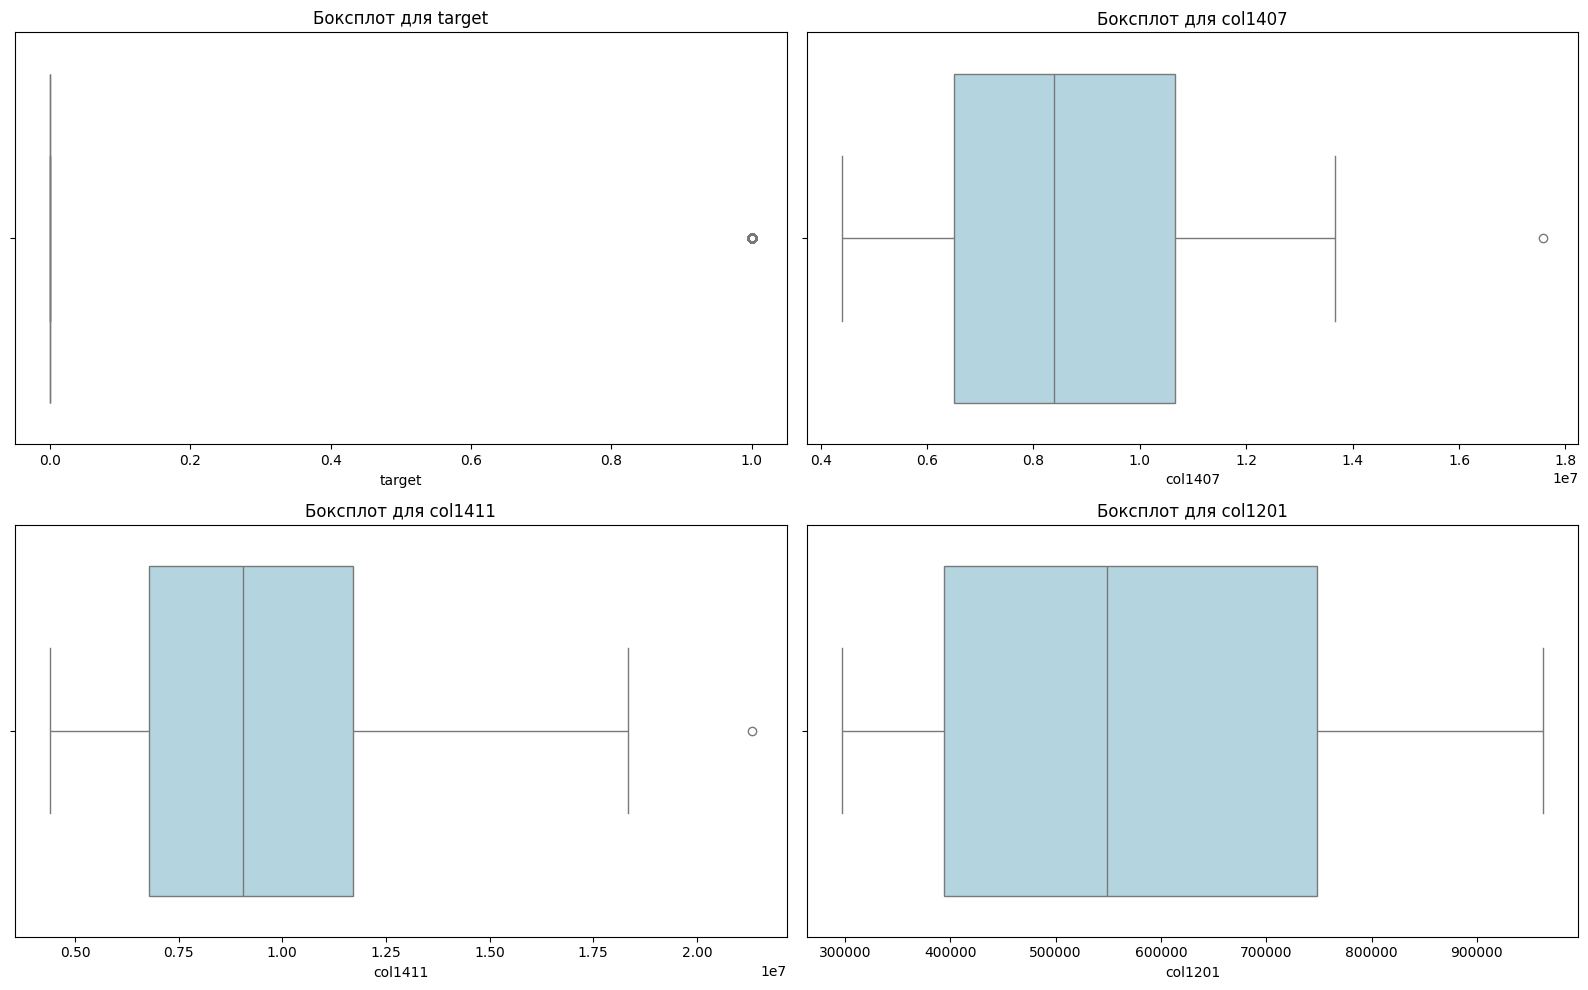

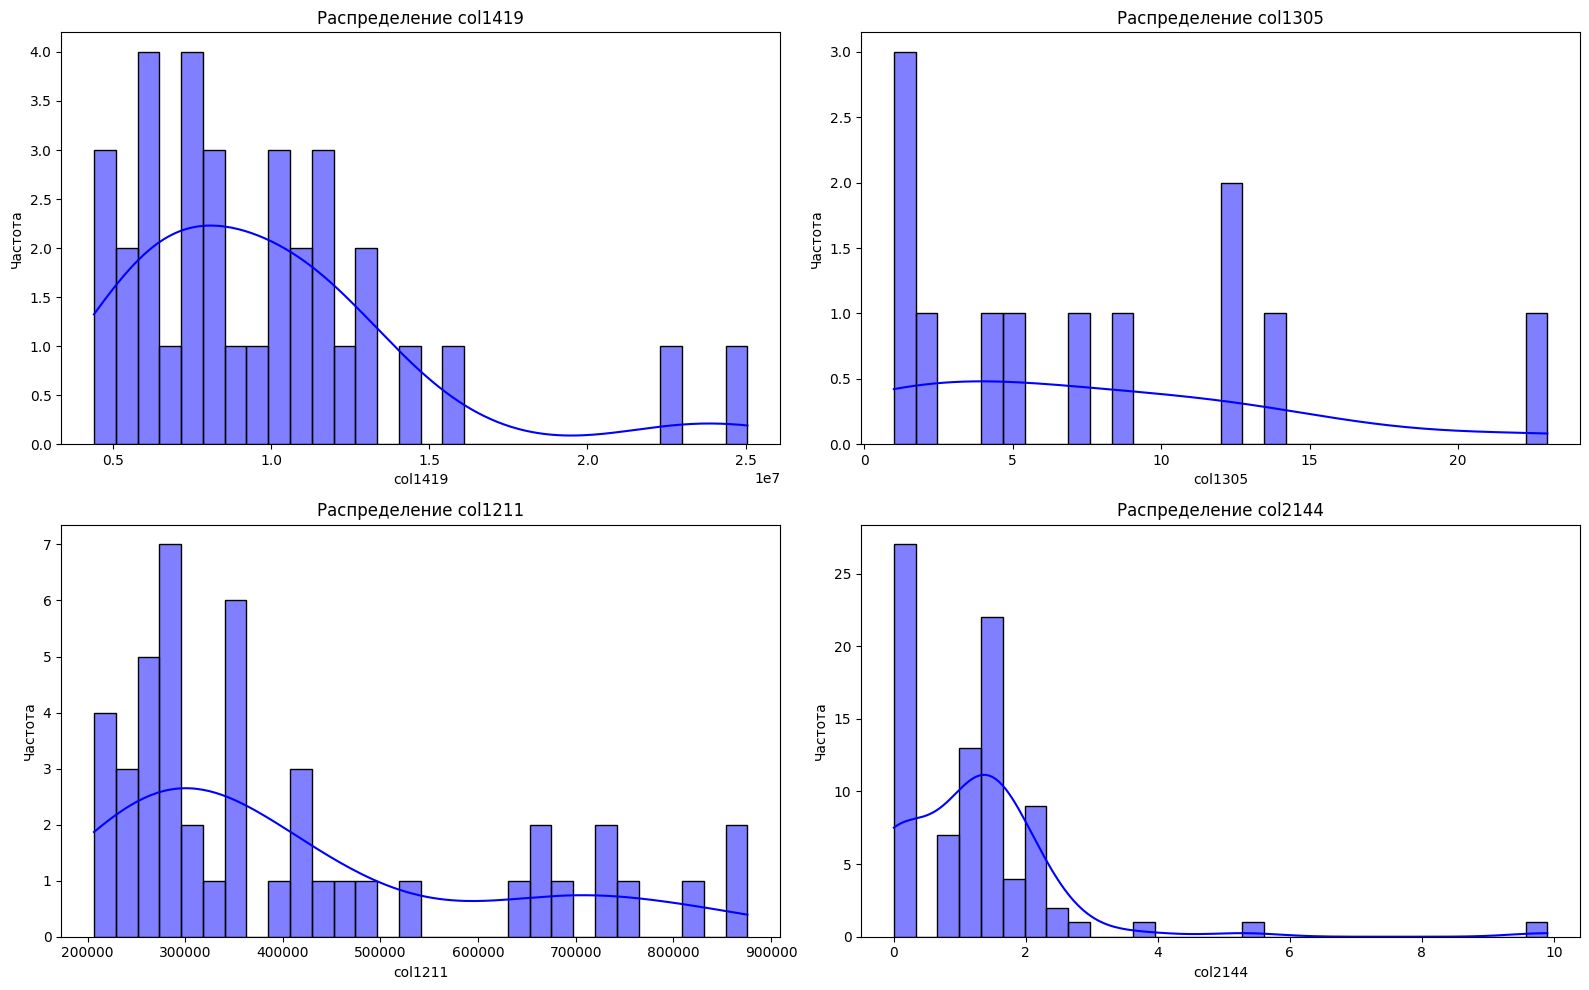

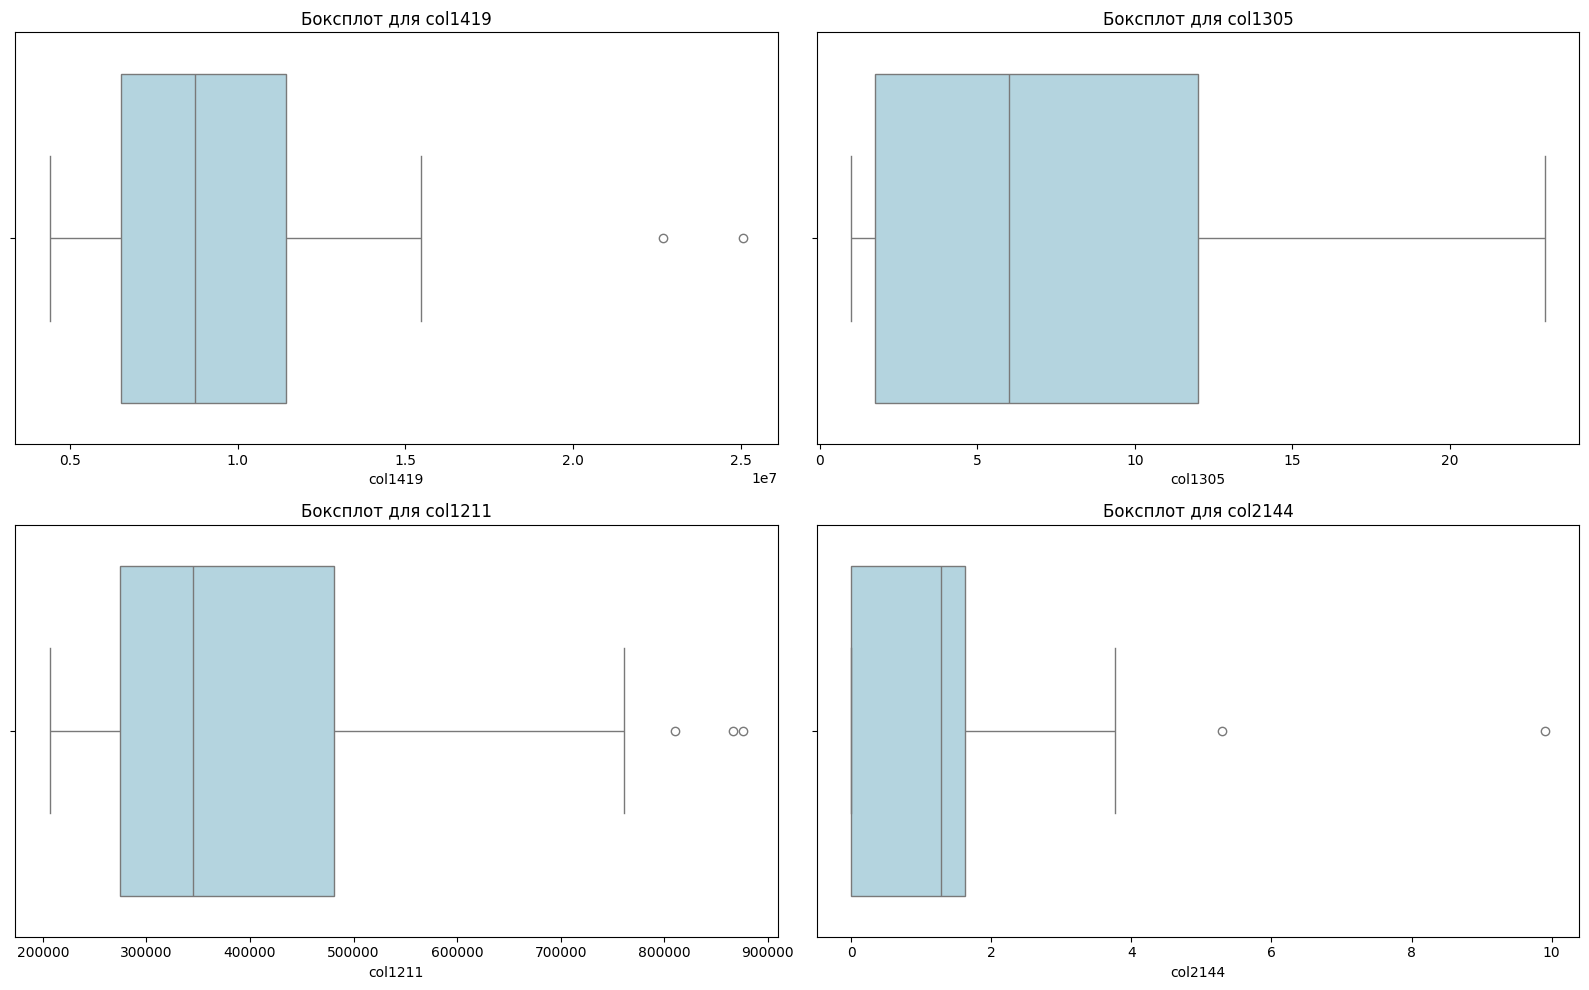

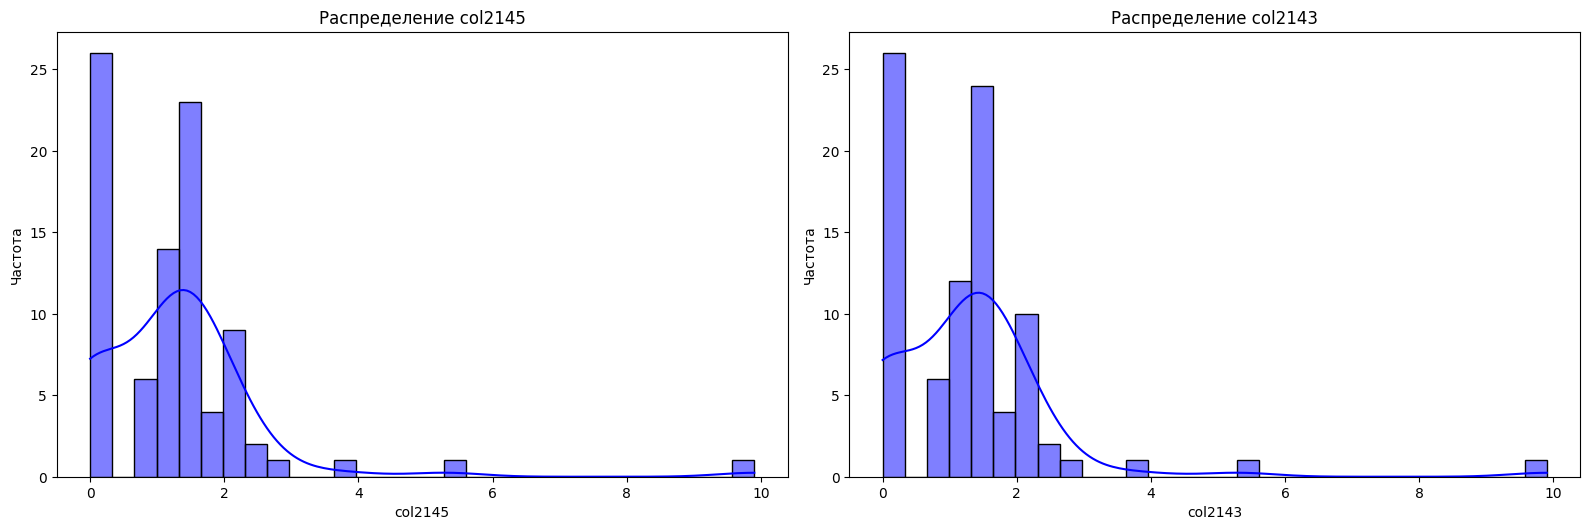

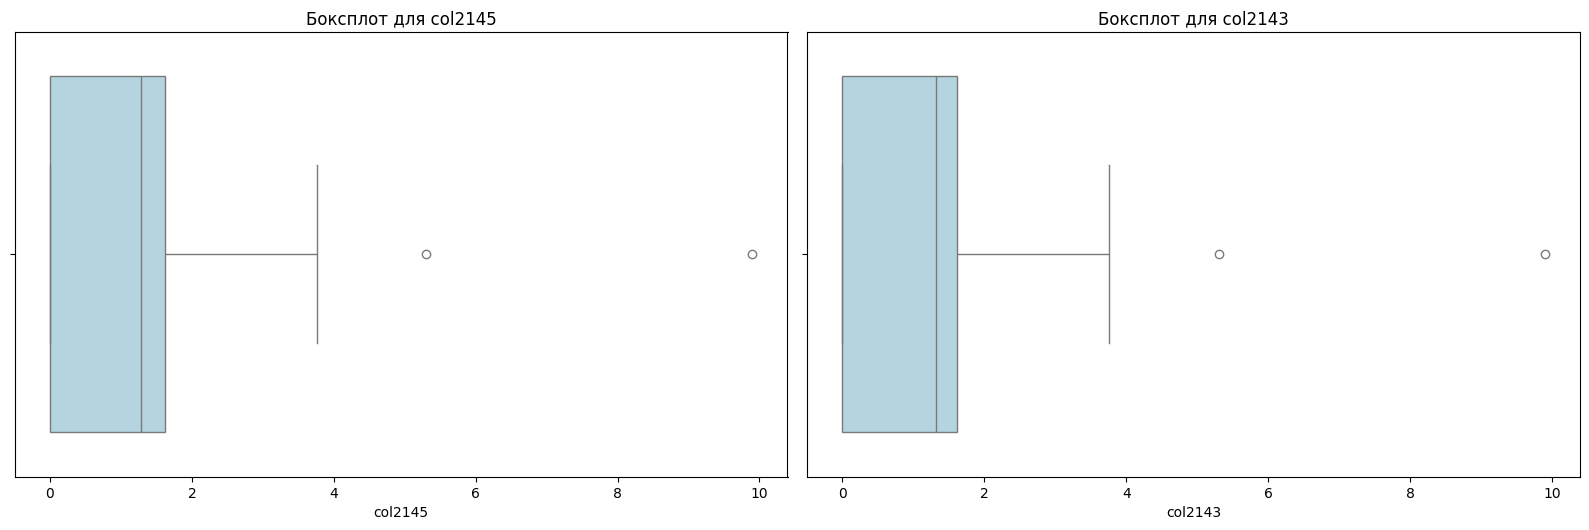

In [ ]:
def analyze_distribution(df, target_col=None, top_n=10):

    print("Основные статистические характеристики:")
    print(df.describe())


    # выбираем только числовые колоноки
    num_cols = df.select_dtypes(include=['number']).columns

    # если указана целевая переменная, ищем корреляцию
    if target_col and target_col in df.columns:
        correlations = df[num_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
        print("Топ коррелирующих колонок с целевой переменной:")
        print(correlations.head(top_n))
        num_cols = correlations.head(top_n).index
    else:
        # иначе берем топ по стандартному отклонению
        stds = df[num_cols].std().sort_values(ascending=False)
        print("Топ колонок с наибольшей вариативностью:")
        print(stds.head(top_n))
        num_cols = stds.head(top_n).index


    cols_per_plot = 4
    for i in range(0, len(num_cols), cols_per_plot):
        subset_cols = num_cols[i:i + cols_per_plot]

        # гистограммы (подходят для того чтобы посмотреть на рспределение)
        plt.figure(figsize=(16, 10))
        for j, col in enumerate(subset_cols):
            plt.subplot(2, 2, j + 1)
            sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black')
            plt.title(f'Распределение {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
        plt.tight_layout()
        plt.show()

        # боксплоты (с помощью них можно посмотреть на выбросы)
        plt.figure(figsize=(16, 10))
        for j, col in enumerate(subset_cols):
            plt.subplot(2, 2, j + 1)
            sns.boxplot(x=df[col], color='lightblue')
            plt.title(f'Боксплот для {col}')
            plt.xlabel(col)
        plt.tight_layout()
        plt.show()

analyze_distribution(df_train, target_col="target", top_n=10)


Выбросы есть, но без них не обойтись.

Тип распределения у колонок показывает, что они не имеют нормальное распределение, а скошены в основном влево. Это может быть от сильной разреженности в данных либо сильного дисбаланса классов

Чтобы наверняка в этом убедиться, можно посмотреть на результат теста Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro

normal_columns = []
for column in df_train.select_dtypes(include=['float', 'int']):
    stat, p = shapiro(df_train[column])
    if p > 0.05:
        normal_columns.append(column)
        print(f'{column} может быть нормально распределена (p-value={p})')
    else:
        print(f'{column} не является нормально распределенной (p-value={p})')


print(f'Колонки с нормальным распределением: {normal_columns}')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14456.
  res = hypotest_fun_out(*samples, **kwds)


client_id не является нормально распределенной (p-value=8.379916499681236e-55)
target не является нормально распределенной (p-value=2.8697540616687263e-121)
col1 не является нормально распределенной (p-value=nan)
col2 не является нормально распределенной (p-value=nan)
col3 не является нормально распределенной (p-value=nan)
col4 не является нормально распределенной (p-value=nan)
col5 не является нормально распределенной (p-value=nan)
col6 не является нормально распределенной (p-value=nan)
col7 не является нормально распределенной (p-value=nan)
col8 не является нормально распределенной (p-value=nan)
col9 не является нормально распределенной (p-value=nan)
col10 не является нормально распределенной (p-value=nan)
col11 не является нормально распределенной (p-value=nan)
col12 не является нормально распределенной (p-value=nan)
col13 не является нормально распределенной (p-value=nan)
col14 не является нормально распределенной (p-value=nan)
col15 не является нормально распределенной (p-value=na

Результаты статистических тестов и визуализации показывают, что датасет и его колонки не имеют нормального распределения, что повлияет на качество модели и на баланс классов

Позже можно будет проверить, изменилась ли ситуация после подготовки данных

# Основная информация о датасете

Количество колонок и их типы в тренировочном и тестовых датасетах различаются

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB


In [ ]:
df_train.describe()

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,3.000000,6.000000,12.000000,19.000000,1.0,1.0,3.000000e+00,8.000000e+00,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.333333,0.500000,0.306548,0.346140,7464071.0,7464071.0,4.762016e+06,4.127563e+06,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.577350,0.547723,0.460514,0.452933,NaN,NaN,2.395190e+06,1.430218e+06,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,2.900000e+06,2.900000e+06,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,3.410988e+06,3.666482e+06,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.500000,0.000000,0.000000,7464071.0,7464071.0,3.921976e+06,3.921976e+06,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.500000,1.000000,0.758929,0.839286,7464071.0,7464071.0,5.693024e+06,3.958614e+06,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7464071.0,7464071.0,7.464071e+06,7.464071e+06,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


С помощью метода describe можем увидеть что колонка 2663 скорре всего обозначает вероятность наличия у клиента авто

In [ ]:
df_train = df_train.rename(columns={'col2663': 'probability'})

In [ ]:
df_valid = df_valid.rename(columns={'col2663': 'probability'})

In [ ]:
# размер датасета
df_train.shape

(14456, 2666)

In [ ]:
# какие есть object колонки
object_columns = df_train.select_dtypes(include=['object'])
object_columns

,report_date,col49,col50,col51,col52,col53,col54,col55,col56,col57,...,col1653,col1654,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198
0,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14452,2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14453,2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14454,2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все что закрашено синим это и есть пропуски, и их очень много

<Axes: >

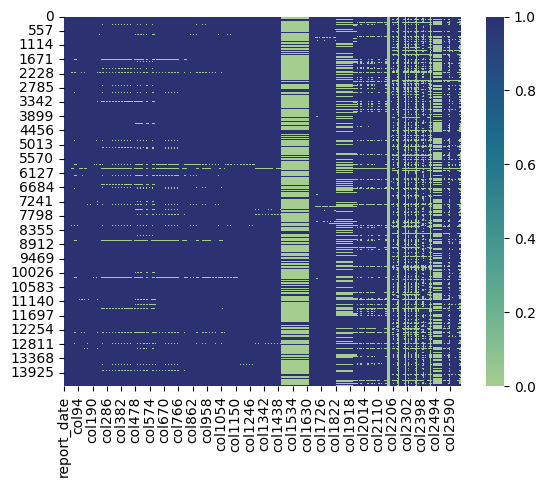

In [ ]:
# пропуски в тренировочном датасете
sns.heatmap(df_train.isnull(), cmap = "crest")

# Удаление

Удаление всех колонок, в которых значения отстутствуют на 70+ процентов

In [ ]:
procentage = (df_train.isnull().sum() / len(df_train)*100).astype(int)
sort = procentage.sort_values(ascending=False)
columns_with70_missing = sort[sort > 70]
columns_list = columns_with70_missing.index.to_list()
columns_list

['col774',
 'col1729',
 'col1752',
 'col1753',
 'col1775',
 'col1776',
 'col1777',
 'col1799',
 'col1800',
 'col1801',
 'col792',
 'col791',
 'col790',
 'col2247',
 'col2248',
 'col2249',
 'col2250',
 'col2251',
 'col2252',
 'col1751',
 'col1728',
 'col2254',
 'col1727',
 'col773',
 'col1173',
 'col1069',
 'col1655',
 'col1656',
 'col1657',
 'col1658',
 'col1659',
 'col1660',
 'col1674',
 'col1675',
 'col1679',
 'col1680',
 'col1681',
 'col1703',
 'col1704',
 'col1705',
 'col2253',
 'col1673',
 'col2255',
 'col788',
 'col789',
 'col778',
 'col779',
 'col780',
 'col2542',
 'col2541',
 'col775',
 'col2539',
 'col2538',
 'col783',
 'col782',
 'col2265',
 'col2266',
 'col2267',
 'col781',
 'col2537',
 'col2536',
 'col2535',
 'col2270',
 'col2269',
 'col2268',
 'col2256',
 'col2540',
 'col787',
 'col2264',
 'col2262',
 'col2261',
 'col776',
 'col2260',
 'col777',
 'col786',
 'col785',
 'col784',
 'col2259',
 'col2258',
 'col2257',
 'col2263',
 'col1161',
 'col1162',
 'col1159',
 'col1131',


In [ ]:
df_train.drop(columns_list, axis=1, inplace=True)

In [ ]:
df_train.shape

(14456, 503)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 503 entries, report_date to probability
dtypes: float64(498), int64(3), object(2)
memory usage: 55.5+ MB


# Поиск дубликатов

Удаление дублирующихся колонок. Но с одной проблемой: значения могут отличаться всего на одну строку, а в остальном дублировать другие. Позже этот момент обработан

In [ ]:
def del_duble(df):
  unique_columns = []
  for column in df.columns:
    if not any(df[column].equals(df[col]) for col in unique_columns):
      unique_columns.append(column)
  return df[unique_columns]

df_train = del_duble(df_train)
df_train.head(10)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,probability
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,362.0,362.0,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
number_of_duplicates_bylines = df_train.duplicated().sum()
print(f'Количество дубликатов по строкам {number_of_duplicates_bylines}')

Количество дубликатов по строкам 0


в данных очень много мусора. ненужные ссылки, хэши, пути, с какого устройства и браузера заходили и т.д.


# Работа с object колонками

In [ ]:
object_columns = df_train.select_dtypes(include=['object'])
for column in object_columns.columns:
    unique_values = object_columns[column].unique()
    print(f"Уникальные значения по столбцу '{column}':")
    print(unique_values)
    print("-" * 50)

Уникальные значения по столбцу 'report_date':
['2022-11-01' '2022-05-01' '2022-09-01' '2022-08-01' '2023-02-01'
 '2023-01-01' '2022-02-01' '2022-12-01' '2022-06-01' '2022-10-01'
 '2021-08-01' '2021-05-01' '2022-04-01' '2022-03-01' '2022-07-01'
 '2021-10-01' '2021-02-01' '2022-01-01' '2021-12-01' '2021-04-01'
 '2021-06-01' '2021-11-01' '2021-07-01' '2021-09-01' '2021-03-01']
--------------------------------------------------
Уникальные значения по столбцу 'col1454':
['00f3d719-a6ec-4960-ba01-8372eb705443'
 '01febac0-b083-494e-8589-f98400074b94'
 '0278175e-c0bb-4e1e-bfe5-20db6811d3e2' ...
 'eb4322a5-4650-ed11-b823-005056b825cd'
 'f99a16a8-c0ef-ec11-b822-005056b8a6c4'
 'fdf04fb7-5404-4a9c-ae5b-e1e893060631']
--------------------------------------------------


Удаление хэша

In [ ]:
import re


object_col = df_train.select_dtypes(include=['object'])


hash_pattern = r'^[0-9a-f]{8}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{12}$'


columns_to_drop = []


for column in object_col.columns:

    if object_col[column].astype(str).str.match(hash_pattern, na=False).any():
        columns_to_drop.append(column)


df_train = df_train.drop(columns=columns_to_drop, axis=1)


print("Удаленные столбцы:", columns_to_drop)

Удаленные столбцы: []


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 30.3+ MB


In [ ]:
object_col.head()

,report_date
0,2022-11-01
1,2022-11-01
2,2022-05-01
3,2022-09-01
4,2022-08-01


Теперь, когда обработка была чуть чуть проведена, можно в valid.csv оставить только те колонки, что и в train.csv

In [ ]:
df_valid = df_valid[df_train.columns]


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 7.6+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 30.3+ MB


Эта колонка должна быть строго int

In [ ]:
df_train['client_id']

,client_id
0,1
1,5
2,6
3,7
4,8
...,...
14451,1241
14452,1969
14453,7116
14454,7117


In [ ]:
!pip install catboost

# Base-line модель (2 варианта)



Catboost

Работает даже на пропусках, кодирует категориальные колонки

In [ ]:
def train_catboost(df):
    from catboost import CatBoostClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt

    # надо сделать копию, поскольку мне нам не надо чтобы изменялся основной датасет
    # на этом этапе важнее всего понять какая модель будет лучше всего работать с данными
    df_copy = df.copy()

    # категориальные признаки
    cat_features = df_copy.select_dtypes(include=['object']).columns.tolist()

    # заполняем пропуски на missing
    df_copy[cat_features] = df_copy[cat_features].fillna('missing')

    # разделяем на признаки и целевую переменную
    X = df_copy.drop(columns=['target'])
    y = df_copy['target']

    # обучающая и тестовая выборка
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

    # модель CatBoost
    model = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        cat_features=cat_features,
        eval_metric='AUC'
    )

    # обучение
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

    # прогноз вероятности
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # оценка ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC на тестовом датасете (CatBoost): {roc_auc}")
    print(f"Лучшая итерация: {model.best_iteration_}")
    print(f"Лучшее значение метрики: {model.best_score_}")

    # ROC-кривая
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    return model


XGBoost

In [ ]:
!pip install xgboost

In [ ]:
def train_xgboost(df):
    import xgboost as xgb
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
    import matplotlib.pyplot as plt

    # также копируем датасет
    df_copy = df.copy()


    cat_features = df_copy.select_dtypes(include=['object']).columns.tolist()

    # преобразование категориальных признаков
    df_copy[cat_features] = df_copy[cat_features].astype('category')


    X = df_copy.drop(columns=['target'])
    y = df_copy['target']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

    # модель XGBoost
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        eval_metric='auc',
        enable_categorical=True
    )

    # обучение
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)


    y_pred_proba = model.predict_proba(X_test)[:, 1]


    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC на тестовом датасете (XGBoost): {roc_auc}')

    # оценка Precision-Recall AUC
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    # график Precision-Recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (XGBoost)')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()


0:	test: 0.6465257	best: 0.6465257 (0)	total: 28.9ms	remaining: 2.86s
10:	test: 0.7592828	best: 0.7592828 (10)	total: 385ms	remaining: 3.12s
20:	test: 0.8005945	best: 0.8005945 (20)	total: 743ms	remaining: 2.79s
30:	test: 0.8308094	best: 0.8308094 (30)	total: 1.14s	remaining: 2.54s
40:	test: 0.8394110	best: 0.8414768 (36)	total: 1.49s	remaining: 2.14s
50:	test: 0.8516952	best: 0.8516952 (50)	total: 1.83s	remaining: 1.76s
60:	test: 0.8592971	best: 0.8595720 (59)	total: 2.21s	remaining: 1.41s
70:	test: 0.8707079	best: 0.8707079 (70)	total: 2.55s	remaining: 1.04s
80:	test: 0.8758052	best: 0.8758052 (80)	total: 2.9s	remaining: 680ms
90:	test: 0.8801013	best: 0.8801013 (90)	total: 3.26s	remaining: 322ms
99:	test: 0.8812258	best: 0.8817602 (98)	total: 3.77s	remaining: 0us

bestTest = 0.8817602446
bestIteration = 98

Shrink model to first 99 iterations.
ROC-AUC на тестовом датасете (CatBoost): 0.8817602446368789
Лучшая итерация: 98
Лучшее значение метрики: {'learn': {'Logloss': 0.065495879751

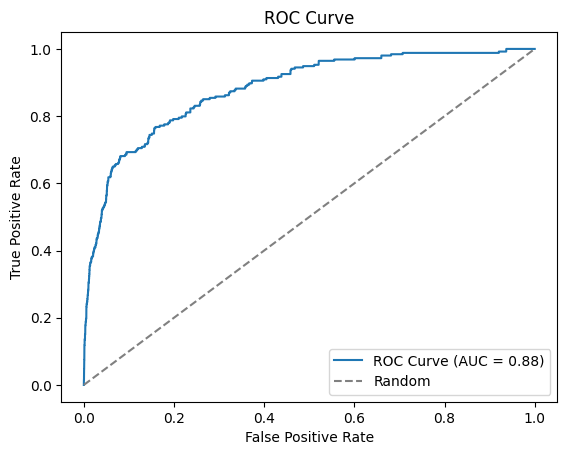

In [ ]:
catboost_model = train_catboost(df_train)


Показатели Logloss хорошие — на обучающем наборе значение 0.0690, а на валидационном 0.0895
Это указывает на низкую ошибку модели в задаче классификации

[0]	validation_0-auc:0.74604
[10]	validation_0-auc:0.84110
[20]	validation_0-auc:0.87650
[30]	validation_0-auc:0.88945
[40]	validation_0-auc:0.89669
[50]	validation_0-auc:0.89987
[60]	validation_0-auc:0.90257
[70]	validation_0-auc:0.90212
[80]	validation_0-auc:0.90597
[90]	validation_0-auc:0.90815
[99]	validation_0-auc:0.90966
ROC-AUC на тестовом датасете (XGBoost): 0.9096643724166309


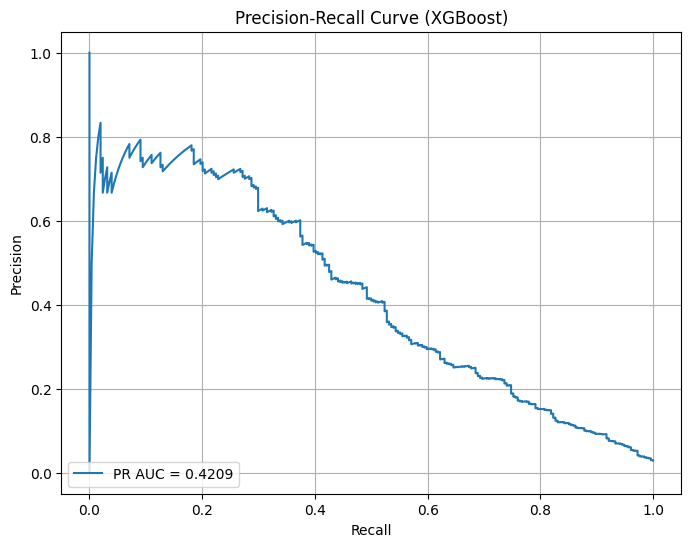

In [ ]:
xgboost_model = train_xgboost(df_train)

На одних и тех же сырых данных XGBoost показала более хорошие результаты, значит, надо выбирать именно её

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 30.3+ MB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 7.6+ MB


# Удаление выбросов

Для начала, можно посмотреть как много колонок содержат выбросы

In [ ]:
outlier_cols = []

# все числовые колонки
possible_outliers = df_train.select_dtypes(include=['float', 'int'])

for column in possible_outliers.columns:
# вычисление границ
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1


    outliers = (possible_outliers[column] < Q1 - 1.5 * IQR) | (possible_outliers[column] > Q3 + 1.5 * IQR)


    if any(outliers):
        outlier_cols.append(column)


print("Колонки с выбросами:", outlier_cols)

Колонки с выбросами: ['target', 'col1453', 'col1455', 'col1456', 'col1457', 'col1458', 'col1459', 'col1460', 'col1461', 'col1462', 'col1463', 'col1464', 'col1465', 'col1466', 'col1467', 'col1468', 'col1469', 'col1470', 'col1471', 'col1472', 'col1474', 'col1475', 'col1476', 'col1487', 'col1488', 'col1489', 'col1490', 'col1491', 'col1492', 'col1493', 'col1494', 'col1495', 'col1496', 'col1497', 'col1498', 'col1499', 'col1500', 'col1502', 'col1503', 'col1504', 'col1505', 'col1506', 'col1507', 'col1508', 'col1509', 'col1510', 'col1511', 'col1512', 'col1513', 'col1514', 'col1515', 'col1516', 'col1518', 'col1520', 'col1521', 'col1522', 'col1523', 'col1524', 'col1823', 'col1824', 'col1825', 'col1826', 'col1827', 'col1828', 'col1829', 'col1830', 'col1831', 'col1832', 'col1833', 'col1834', 'col1835', 'col1836', 'col1837', 'col1838', 'col1839', 'col1840', 'col1841', 'col1842', 'col1843', 'col1844', 'col1845', 'col1847', 'col1848', 'col1849', 'col1850', 'col1851', 'col1852', 'col1853', 'col1855', 

In [ ]:
df_train = df_train.dropna(how = 'all', axis = 1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(3), object(1)
memory usage: 30.3+ MB


In [ ]:
df_valid = df_valid[df_train.columns]

## 2-й этап.  Работа с пропусками



Удаляем колонки которые полностью содержат nan значения

# Обработка числовых и object колонок

Числовые колонки можно заполнить с помощью медианы через SimpleImputer, а пропуски в категориальных данных с помощью missing

In [ ]:
from sklearn.impute import SimpleImputer

num_features = df_train.select_dtypes(include=['float64']).columns.tolist()

# выбираем медиану
imputer_num = SimpleImputer(strategy='median')

# обучаем на df_train и применяем к df_train и df_valid
df_train[num_features] = imputer_num.fit_transform(df_train[num_features])
df_valid[num_features] = imputer_num.transform(df_valid[num_features])


cat_features = df_train.select_dtypes(include=['object']).columns.tolist()

# выбираем моду
imputer_cat = SimpleImputer(strategy='most_frequent')


df_train[cat_features] = imputer_cat.fit_transform(df_train[cat_features])
df_valid[cat_features] = imputer_cat.transform(df_valid[cat_features])



In [ ]:
df_valid['client_id']

,client_id
0,2
1,4
2,9
3,12
4,14
...,...
3637,4366
3638,8298
3639,835
3640,8300


Все данные (категориальные и числовые были успешно заполнены)

<Axes: >

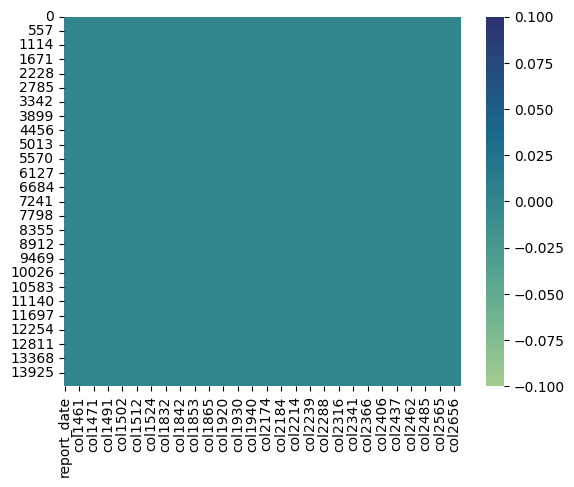

In [ ]:
sns.heatmap(df_train.isnull(), cmap = "crest")

Все пропуски заполнились!

<Axes: >

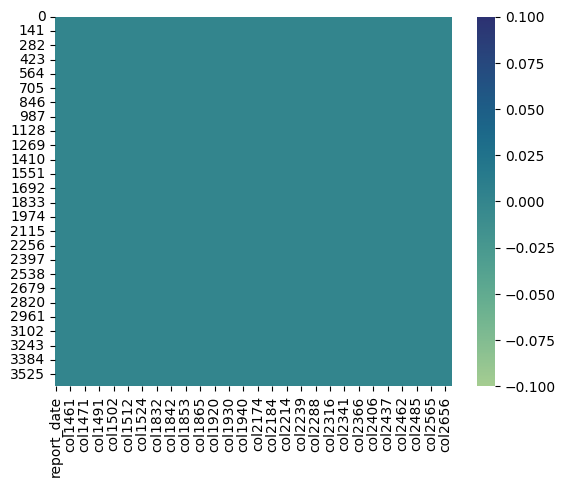

In [ ]:
sns.heatmap(df_valid.isnull(), cmap = "crest")

Способ удаления выбросов (уменьшение их количества) с помощью IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

def remove_outliers_isolation_forest(df, contamination=0.1):

    model = IsolationForest(contamination=contamination, random_state=42)

    num_data = df.select_dtypes(include=np.number)
    model.fit(num_data)

    # предсказываем "нормальность" данных (-1: выброс, 1: нормально)
    df['anomaly'] = model.predict(num_data)

    # удаляем выбросы (строки с anomaly == -1)
    df_cleaned = df[df['anomaly'] == 1].drop(columns=['anomaly'])

    # сбрасываем индексы, чтобы избежать проблем с индексами
    df_cleaned = df_cleaned.reset_index(drop=True)

    return df_cleaned


df_train = remove_outliers_isolation_forest(df_train, contamination=0.1)  # удаляем 10% самых аномальных строк

<ipython-input-265-a5a824613b05>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['anomaly'] = model.predict(num_data)


# Кодировка

Преобразуем категориальные данные в числовые, чтобы можно было дальше работать с моделью с помощью OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def encode(df):
  categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
  ordinal_encoder = OrdinalEncoder()
  encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
  df[categorical_columns] = encoded_data.astype(int)
  return df

encode(df_train)

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,probability
0,21,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261
1,21,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,15,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261
3,19,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.258682
4,18,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13005,18,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,240.0,240.0,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
13006,17,1241,0,0,0.0,0.0,0.0,0.0,2.0,2.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.276902
13007,19,1969,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.260516
13008,6,7117,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261


In [ ]:
encode(df_valid)

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,probability
0,1,2,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2,4,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2,9,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261
4,0,14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,6240000.0,6164000.0,6224000.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1,4366,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,6240000.0,6164000.0,6224000.0,3500000.0,3500000.0,3500000.0,0.256261
3638,1,8298,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261
3639,0,835,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256919
3640,0,8300,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.257217


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(4)
memory usage: 27.3 MB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(4)
memory usage: 7.6 MB


Оставляем в df_valid только те колонки, которые есть и в df_train

In [ ]:
df_valid = df_valid[df_train.columns]

In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 275 entries, report_date to probability
dtypes: float64(271), int64(4)
memory usage: 7.6 MB


# Нормализация

Данные не распределены нормально, поэтому подходит MinMaxScaler

Нужно нормализовать и тренировоные и тестовые данные, чтобы они подходили по пасштабу

Выбросы в тренировочных не удалялись  для проверки работы модели

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_valid[num_features] = scaler.transform(df_valid[num_features])


# Baseline модель 2.0.

Логистическая регрессия

In [ ]:
def train_logistic_regression(df):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd


    df_copy = df.copy()

    # если есть 'target'
    if 'target' not in df_copy.columns:
        raise ValueError("В датасете отсутствует колонка 'target'")

    # уникальные значения в target
    class_counts = df_copy['target'].value_counts()
    print("Распределение классов в target:")
    print(class_counts)

    if len(class_counts) < 2:
        print("В target только один класс. Добавляем строки с другим классом для теста.")
        # генерация строк с другим классом для теста
        new_rows = pd.DataFrame({
            'target': [1 - class_counts.index[0]] * 10,  # добавление строки с другим классом
            **{col: np.random.rand(10) for col in df_copy.columns if col != 'target'}
        })
        df_copy = pd.concat([df_copy, new_rows], ignore_index=True)

    # исключаем 'target' и 'probability'
    X = df_copy.drop(columns=['target', 'probability'], errors='ignore')
    y = df_copy['target']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # предсказание вероятности
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC: {roc_auc:.4f}")

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Logistic Regression)')
    plt.legend()
    plt.grid()
    plt.show()

    return model



Уже здесь можно увидеть насколько велик дисбаланс классов

Распределение классов в target:
target
0    12689
1      321
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.7588


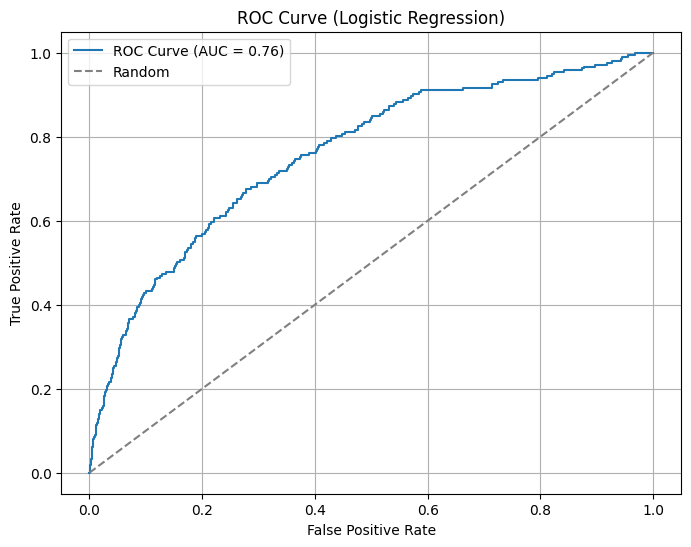

In [ ]:
logistic_model = train_logistic_regression(df_train)

Баланс классов в target:
target
0    0.975327
1    0.024673
Name: proportion, dtype: float64


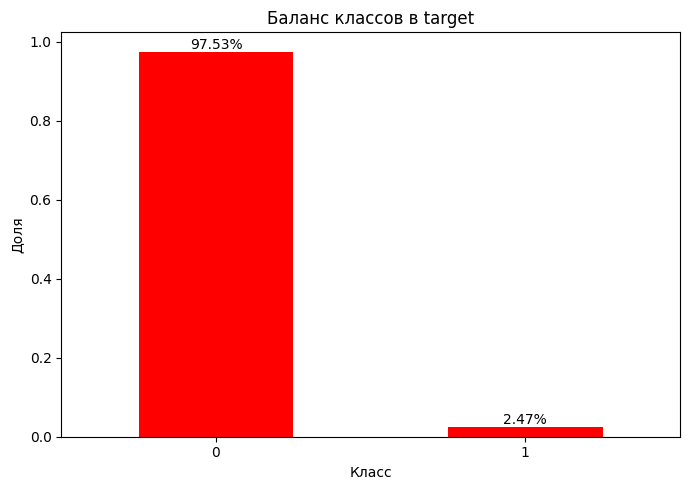

In [ ]:
X_train = df_train.drop(columns=['target', 'client_id'])
y_train = df_train['target']

# баланс классов для target
class_balance = y_train.value_counts(normalize=True)
print("Баланс классов в target:")
print(class_balance)

# график баланса классов в target
plt.figure(figsize=(7, 5))
class_balance.plot(kind='bar', color='red')
plt.title('Баланс классов в target')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.xticks(rotation=0)
for f, e in enumerate(class_balance):
    plt.text(f, e, f'{e:.2%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Отбор наиболее влияющих признаков. Селекция для модели

Для модели нужно отобрать наиболее влияющие на целевую переменную target признаки

In [ ]:
correlation_matrix = df_train.corr()


target_correlation = correlation_matrix['target']


have_correlation_columns = target_correlation[abs(target_correlation) >= 0].index.tolist()




print("Столбцы имеющие корреляцию:", have_correlation_columns)

Столбцы имеющие корреляцию: ['report_date', 'client_id', 'target', 'col1453', 'col1455', 'col1456', 'col1457', 'col1458', 'col1459', 'col1460', 'col1461', 'col1462', 'col1463', 'col1464', 'col1465', 'col1466', 'col1467', 'col1468', 'col1469', 'col1470', 'col1472', 'col1474', 'col1475', 'col1476', 'col1487', 'col1488', 'col1489', 'col1490', 'col1491', 'col1492', 'col1493', 'col1494', 'col1495', 'col1496', 'col1497', 'col1498', 'col1499', 'col1500', 'col1502', 'col1504', 'col1505', 'col1506', 'col1507', 'col1508', 'col1509', 'col1510', 'col1512', 'col1513', 'col1514', 'col1515', 'col1516', 'col1518', 'col1520', 'col1521', 'col1522', 'col1523', 'col1524', 'col1823', 'col1824', 'col1825', 'col1826', 'col1827', 'col1828', 'col1829', 'col1830', 'col1831', 'col1832', 'col1833', 'col1834', 'col1835', 'col1836', 'col1837', 'col1838', 'col1839', 'col1840', 'col1841', 'col1842', 'col1843', 'col1844', 'col1845', 'col1847', 'col1848', 'col1849', 'col1850', 'col1851', 'col1852', 'col1853', 'col1855'

In [ ]:
important_columns = df_train[have_correlation_columns]

important_columns.describe()

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,probability
count,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,...,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000
mean,15.979862,2785.264489,0.024673,0.043582,0.002037,0.016872,0.018601,0.026732,0.037998,0.064677,...,0.591661,0.600512,0.590165,0.060773,0.061958,0.060541,0.061565,0.062535,0.061230,0.252011
std,5.979265,1919.538734,0.155134,0.204171,0.032447,0.077951,0.058609,0.065371,0.039545,0.042434,...,0.146658,0.142277,0.145915,0.023340,0.023248,0.023268,0.027043,0.026834,0.026860,0.048052
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,...,0.555556,0.568345,0.555556,0.060798,0.061941,0.060635,0.055067,0.056280,0.054864,0.237584
50%,17.000000,2502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,...,0.560494,0.573141,0.560494,0.060798,0.061941,0.060635,0.060845,0.061765,0.060650,0.237584
75%,21.000000,4163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,...,0.560494,0.573141,0.560494,0.060798,0.061941,0.060635,0.060845,0.061765,0.060650,0.246309
max,24.000000,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
important_columns.shape

(13010, 262)

Всего 262 колонок

In [ ]:
important_columns.shape

(13010, 262)

Есть такие колонки, значения которых отличаются только в одной строке на одну десятую, сотую или тысячную. Это может привести к переобучению, так как корреляция между такими столбцами высокая

Для того чтобы решить эту проблему можно найти среднее и объединить такие колонки

In [ ]:
def merge_high_correlation(df, threshold=0.9):

    correlation_matrix = df.corr()


    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


    for col1, col2 in high_corr_pairs:
        if col1 in df.columns and col2 in df.columns:
            df[col1] = df[[col1, col2]].mean(axis=1)

            df = df.drop(columns=[col2])

    return df


train_df = merge_high_correlation(important_columns, threshold=0.75)
print("Датафрейм после объединения избыточных колонок:")
print(train_df)


<ipython-input-288-43ed4626abaf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = df[[col1, col2]].mean(axis=1)


Датафрейм после объединения избыточных колонок:
       report_date  client_id  target  col1453  col1455  col1456   col1457  \
0               21          1       0        0      0.0     0.00  0.000000   
1               21          5       0        1      0.0     0.00  0.000000   
2               15          6       0        0      0.0     0.00  0.000000   
3               19          7       0        0      0.5     0.25  0.116319   
4               18          8       0        0      0.0     0.00  0.000000   
...            ...        ...     ...      ...      ...      ...       ...   
13005           18       1240       0        0      0.0     0.00  0.000000   
13006           17       1241       0        0      0.0     0.00  0.000000   
13007           19       1969       1        0      0.0     0.00  0.000000   
13008            6       7117       0        0      0.0     0.00  0.000000   
13009           13        849       0        0      0.0     0.00  0.116319   

       col1459 

In [ ]:
valid_df = df_valid[train_df.columns]

In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 121 entries, report_date to probability
dtypes: float64(117), int64(4)
memory usage: 3.4 MB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 121 entries, report_date to probability
dtypes: float64(117), int64(4)
memory usage: 12.0 MB


In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr().round(2), cmap='crest', annot=True)

Теперь можно сохранить очищенные датасеты

In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

output_path = '/content/drive/MyDrive/'

# сохраняем
train_df.to_csv(output_path + 'df_train_clean1.csv', index=False)
valid_df.to_csv(output_path + 'df_valid_clean1.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 121 entries, report_date to probability
dtypes: float64(120), int64(1)
memory usage: 12.0 MB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 121 entries, report_date to probability
dtypes: float64(120), int64(1)
memory usage: 3.4 MB


In [ ]:
valid_df['client_id']

,client_id
0,0.000120
1,0.000361
2,0.000964
3,0.001325
4,0.001566
...,...
3637,0.525840
3638,0.999518
3639,0.100470
3640,0.999759


до этого момента нормально

In [ ]:
!pip install optuna

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 502 entries, report_date to probability
dtypes: float64(501), int64(1)
memory usage: 49.8 MB


In [ ]:
import pandas as pd
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 125 entries, report_date to probability
dtypes: float64(124), int64(1)
memory usage: 12.4 MB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 126 entries, report_date to catboost_score
dtypes: float64(125), int64(1)
memory usage: 3.5 MB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13010 entries, 0 to 13009
Columns: 125 entries, report_date to probability
dtypes: float64(124), int64(1)
memory usage: 12.4 MB


In [ ]:
valid_df = valid_df[train_df.columns]

Обучение модели CatBoost...
0:	test: 0.4862594	best: 0.4862594 (0)	total: 28.4ms	remaining: 14.2s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.7253470104
bestIteration = 24

Shrink model to first 25 iterations.

Проверка CatBoost на валидационных данных...
ROC-AUC для CatBoost: 0.7253

Classification Report для CatBoost:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3576
         1.0       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


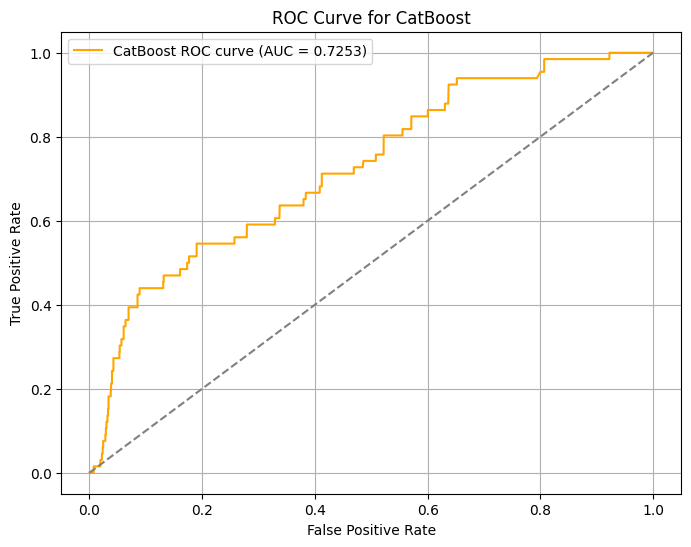

Колонка 'catboost_score' добавлена в valid_df:
   catboost_score
0        0.023962
1        0.098162
2        0.033278
3        0.015249
4        0.013507


<ipython-input-373-798202d8d32d>:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  valid_df['catboost_score'] = y_pred_proba_cb


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# разделяем данные на признаки и целевую переменную
X_train_cb = train_df.drop(columns=['target'])  # признаки для CatBoost на train
y_train_cb = train_df['target']                # целевая переменная для CatBoost на train

X_valid_cb = valid_df.drop(columns=['target'])  # признаки для CatBoost на valid
y_valid_cb = valid_df['target']                # целевая переменная для CatBoost на valid

# создаем и обучаем модель CatBoost
print("Обучение модели CatBoost...")
catboost_model = CatBoostClassifier(
    iterations=500,        # количество итераций (бустингов)
    learning_rate=0.1,     # темп обучения
    depth=6,               # глубина деревьев
    eval_metric='AUC',     # метрика для оценки
    early_stopping_rounds=30,  # раннее прекращение при отсутствии улучшений
    verbose=100            # частота вывода информации во время обучения
)

# обучаем модель на train и валидируем на valid
catboost_model.fit(X_train_cb, y_train_cb, eval_set=(X_valid_cb, y_valid_cb))

# оценка качества модели на valid
print("\nПроверка CatBoost на валидационных данных...")
y_pred_proba_cb = catboost_model.predict_proba(X_valid_cb)[:, 1]  # вероятности класса 1
y_pred_cb = catboost_model.predict(X_valid_cb)                   # предсказания классов

# ROC-AUC
roc_auc_cb = roc_auc_score(y_valid_cb, y_pred_proba_cb)
print(f"ROC-AUC для CatBoost: {roc_auc_cb:.4f}")

# Classification Report
print("\nClassification Report для CatBoost:")
print(classification_report(y_valid_cb, y_pred_cb))

# визуализация ROC-кривой
fpr_cb, tpr_cb, _ = roc_curve(y_valid_cb, y_pred_proba_cb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost ROC curve (AUC = {roc_auc_cb:.4f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost')
plt.legend()
plt.grid()
plt.show()

# сохранение результатов CatBoost в валидационных данных
valid_df['catboost_score'] = y_pred_proba_cb
print("Колонка 'catboost_score' добавлена в valid_df:")
print(valid_df[['catboost_score']].head())


XGBoost

In [ ]:
valid_df = valid_df[train_df.columns]

In [ ]:
!pip install xgboost

In [ ]:
!pip install xgboost --upgrade

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import optuna
import matplotlib.pyplot as plt

# разделяем данные на признаки и целевую переменную
X_train_xgb = train_df.drop(columns=['target'])
y_train_xgb = train_df['target']

X_valid_xgb = valid_df.drop(columns=['target'])
y_valid_xgb = valid_df['target']

# подбор гиперпараметров с Optuna
def optimize_xgboost(trial):
    """Функция для поиска лучших параметров XGBoost с Optuna."""
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'random_state': 42
    }

    # обучение модели
    model = xgb.XGBClassifier(**params)
    model.fit(
        X_train_xgb, y_train_xgb,
        eval_set=[(X_valid_xgb, y_valid_xgb)],
        verbose=0
    )

    # оценка качества
    y_pred_proba = model.predict_proba(X_valid_xgb)[:, 1]
    return roc_auc_score(y_valid_xgb, y_pred_proba)

# запуск оптимизации
print("Запуск оптимизации гиперпараметров для XGBoost...")
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(optimize_xgboost, n_trials=30)

# получаем лучшие параметры
best_params_xgb = study_xgb.best_params
print("\nЛучшие параметры для XGBoost:")
print(best_params_xgb)

# обучение финальной модели XGBoost
print("\nОбучение финальной модели XGBoost...")
xgb_model = xgb.XGBClassifier(**best_params_xgb, objective='binary:logistic', eval_metric='auc', random_state=42)
xgb_model.fit(
    X_train_xgb, y_train_xgb,
    eval_set=[(X_valid_xgb, y_valid_xgb)],
    verbose=100
)

# предсказание на valid_df
print("\nПолучение предсказаний на валидационных данных...")
y_pred_proba_xgb = xgb_model.predict_proba(X_valid_xgb)[:, 1]  # вероятности класса 1

# оценка качества
roc_auc_xgb = roc_auc_score(y_valid_xgb, y_pred_proba_xgb)
print(f"ROC-AUC для XGBoost на valid_df: {roc_auc_xgb:.4f}")

# обновление valid_df с колонкой score
valid_df['score'] = y_pred_proba_xgb
print("Колонка 'score' добавлена в valid_df:")
print(valid_df[['client_id', 'score']].head())

# создание таблицы с client_id и score
submission_df = valid_df[['client_id', 'score']]
print("\nТаблица для отправки (client_id и score):")
print(submission_df.head())

# сохранение файлов
submission_df.to_csv('submission_file.csv', index=False)  # файл с client_id и score
valid_df.to_csv('valid_with_score.csv', index=False)      # обновлённый valid_df с колонкой score

print("\nФайлы успешно сохранены:")
print("- submission_file.csv: Таблица с client_id и score.")
print("- valid_with_score.csv: Обновлённый valid_df с колонкой score.")


[I 2024-12-17 22:37:19,844] A new study created in memory with name: no-name-7fe8dd7c-92d3-40ba-a8fe-33f24f2d6ca8


Запуск оптимизации гиперпараметров для XGBoost...


[I 2024-12-17 22:37:26,942] Trial 0 finished with value: 0.7690029489526135 and parameters: {'n_estimators': 200, 'learning_rate': 0.027526502789321932, 'max_depth': 8, 'subsample': 0.7581659273714396, 'colsample_bytree': 0.6548045194723313, 'reg_alpha': 0.15344786052535211, 'reg_lambda': 0.07778797367095408}. Best is trial 0 with value: 0.7690029489526135.
[I 2024-12-17 22:37:34,758] Trial 1 finished with value: 0.7422293403837029 and parameters: {'n_estimators': 487, 'learning_rate': 0.016946533153272783, 'max_depth': 7, 'subsample': 0.5217057470893212, 'colsample_bytree': 0.9704630560378421, 'reg_alpha': 0.0021774335661513084, 'reg_lambda': 0.007902537843402509}. Best is trial 0 with value: 0.7690029489526135.
[I 2024-12-17 22:37:39,882] Trial 2 finished with value: 0.6996284150227103 and parameters: {'n_estimators': 139, 'learning_rate': 0.08857301920459644, 'max_depth': 5, 'subsample': 0.5631642566186039, 'colsample_bytree': 0.7133174731729025, 'reg_alpha': 0.037924956540360974, '


Лучшие параметры для XGBoost:
{'n_estimators': 254, 'learning_rate': 0.03480490930032642, 'max_depth': 9, 'subsample': 0.6522291815181817, 'colsample_bytree': 0.6707195933452577, 'reg_alpha': 0.42885548328508166, 'reg_lambda': 0.0768691361414899}

Обучение финальной модели XGBoost...
[0]	validation_0-auc:0.46559
[100]	validation_0-auc:0.76791
[200]	validation_0-auc:0.77719
[253]	validation_0-auc:0.77881

Получение предсказаний на валидационных данных...
ROC-AUC для XGBoost на valid_df: 0.7788
Колонка 'score' добавлена в valid_df:
   client_id     score
0   0.000120  0.004270
1   0.000361  0.008416
2   0.000964  0.005472
3   0.001325  0.003870
4   0.001566  0.018820

Таблица для отправки (client_id и score):
   client_id     score
0   0.000120  0.004270
1   0.000361  0.008416
2   0.000964  0.005472
3   0.001325  0.003870
4   0.001566  0.018820


<ipython-input-383-b5862b0f1591>:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  valid_df['score'] = y_pred_proba_xgb



Файлы успешно сохранены:
- submission_file.csv: Таблица с client_id и score.
- valid_with_score.csv: Обновлённый valid_df с колонкой score.


ROC-AUC для XGBoost: 0.7788


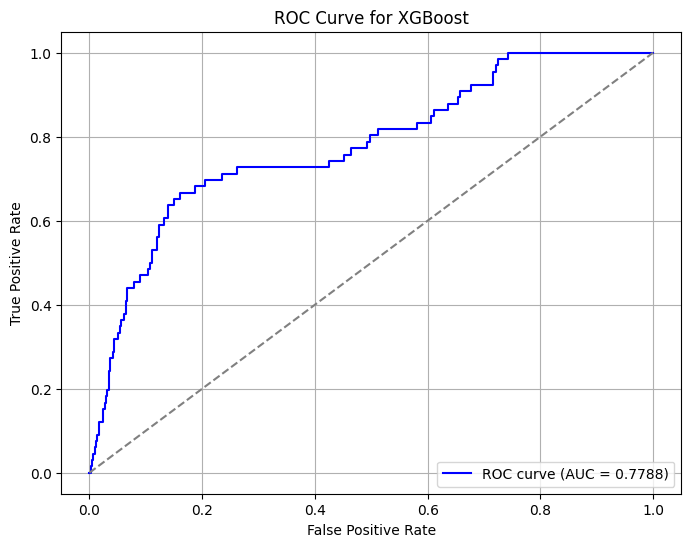

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# предсказание вероятностей на валидационной выборке
y_pred_proba_xgb = xgb_model.predict_proba(X_valid_xgb)[:, 1]

# оценка ROC-AUC
roc_auc_xgb = roc_auc_score(y_valid_xgb, y_pred_proba_xgb)
print(f"ROC-AUC для XGBoost: {roc_auc_xgb:.4f}")

# построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid_xgb, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_xgb:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Обучение модели Логистической регрессии...

ROC-AUC для Логистической регрессии на valid_df: 0.6997


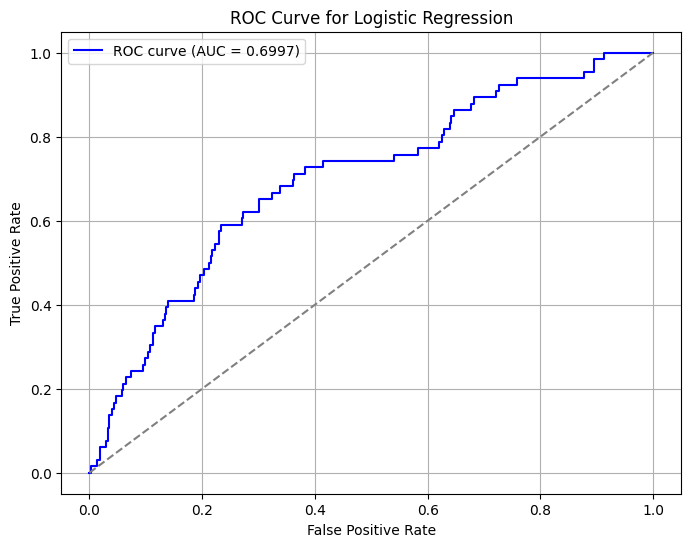

Колонка 'score' добавлена в valid_df:
   client_id     score
0   0.000120  0.014915
1   0.000361  0.205345
2   0.000964  0.063345
3   0.001325  0.024049
4   0.001566  0.015956


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# разделение данных на признаки и целевую переменную
X_train_lr = train_df.drop(columns=['target'])
y_train_lr = train_df['target']

X_valid_lr = valid_df.drop(columns=['target'])
y_valid_lr = valid_df['target']

# приведение valid_df к тем же колонкам, что и train_df
X_valid_lr = X_valid_lr[X_train_lr.columns]

# обучение модели Логистической регрессии
print("Обучение модели Логистической регрессии...")
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_lr, y_train_lr)

# предсказание вероятностей на valid_df
y_pred_proba_lr = logreg_model.predict_proba(X_valid_lr)[:, 1]

# оценка качества модели
roc_auc_lr = roc_auc_score(y_valid_lr, y_pred_proba_lr)
print(f"\nROC-AUC для Логистической регрессии на valid_df: {roc_auc_lr:.4f}")

# визуализация ROC-кривой
fpr, tpr, _ = roc_curve(y_valid_lr, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_lr:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# добавление колонки score в valid_df
valid_df['score'] = y_pred_proba_lr
print("Колонка 'score' добавлена в valid_df:")
print(valid_df[['client_id', 'score']].head())
